# Assignment 10
You are provided with a dataset from USA Forensic Science Service
which has description of 6 types of glass; defined in terms of their
oxide content (i.e. Na, Fe, K, etc). Your task is to use K-Nearest
Neighbor (KNN) classifier to classify the glasses.
The original dataset is available at
(https://archive.ics.uci.edu/ml/datasets/glass+identification). For
detailed description on the attributes of the dataset,
please refer to the original link of the dataset in the UCI ML
repository.
But the shared drive folder have the dataset for your convenience
perform exploratory data analysis on the dataset using Python Pandas,
including dropping irrelevant fields for predicted values, and
standardization of each attribute.
Following data cleaning, two Scikit-Learn KNN models should be created
for two different distance metrics: Square Euclidean and Manhattan
distance. The performance of the two models using different distance
metrics should be compared in terms of accuracy to the test data and
Scikit-Learn Classification Report.

In [2]:
import pandas as pd           
import numpy as np                                             
from sklearn.model_selection import train_test_split       
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']
data = pd.read_csv('trainKNN.txt', names=column_names)

In [4]:
data.drop('Id', axis=1, inplace=True)

In [5]:
print("Dataset Shape:")
print(data.shape)

Dataset Shape:
(196, 10)


In [6]:
print("\nFirst 5 rows of the dataset:")
print(data.head())



First 5 rows of the dataset:
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [7]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
               RI          Na          Mg          Al          Si           K  \
count  196.000000  196.000000  196.000000  196.000000  196.000000  196.000000   
mean     1.518295   13.375204    2.758980    1.454337   72.635408    0.519388   
std      0.003055    0.783145    1.392641    0.491688    0.763578    0.672703   
min      1.511310   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516458   12.877500    2.362500    1.190000   72.317500    0.140000   
50%      1.517630   13.280000    3.480000    1.360000   72.810000    0.560000   
75%      1.518985   13.792500    3.610000    1.622500   73.080000    0.610000   
max      1.533930   15.790000    4.490000    3.500000   75.180000    6.210000   

               Ca          Ba          Fe        Type  
count  196.000000  196.000000  196.000000  196.000000  
mean     8.910714    0.164235    0.050255    2.668367  
std      1.421490    0.485198    0.086359    2.062416  
min      5.430000    0.00

In [8]:
print("\nNumber of unique values in each column:")
print(data.nunique())



Number of unique values in each column:
RI      164
Na      136
Mg       90
Al      111
Si      124
K        65
Ca      133
Ba       30
Fe       28
Type      6
dtype: int64


In [9]:
print("\nCorrelation Matrix:")
print(data.corr())


Correlation Matrix:
            RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.158559 -0.153610 -0.446641 -0.530520 -0.296570  0.821277   
Na   -0.158559  1.000000 -0.216384  0.234219 -0.196462 -0.248626 -0.278983   
Mg   -0.153610 -0.216384  1.000000 -0.520530 -0.095263 -0.039185 -0.461244   
Al   -0.446641  0.234219 -0.520530  1.000000  0.010147  0.335160 -0.284701   
Si   -0.530520 -0.196462 -0.095263  0.010147  1.000000 -0.181488 -0.197767   
K    -0.296570 -0.248626 -0.039185  0.335160 -0.181488  1.000000 -0.321540   
Ca    0.821277 -0.278983 -0.461244 -0.284701 -0.197767 -0.321540  1.000000   
Ba    0.009425  0.336526 -0.488494  0.477098 -0.162194 -0.019632 -0.100585   
Fe    0.104980 -0.250335  0.066167 -0.067659 -0.058347 -0.011720  0.120076   
Type -0.166670  0.484154 -0.714713  0.640944  0.092812  0.029423 -0.019545   

            Ba        Fe      Type  
RI    0.009425  0.104980 -0.166670  
Na    0.336526 -0.250335  0.484154  
Mg   -0.4

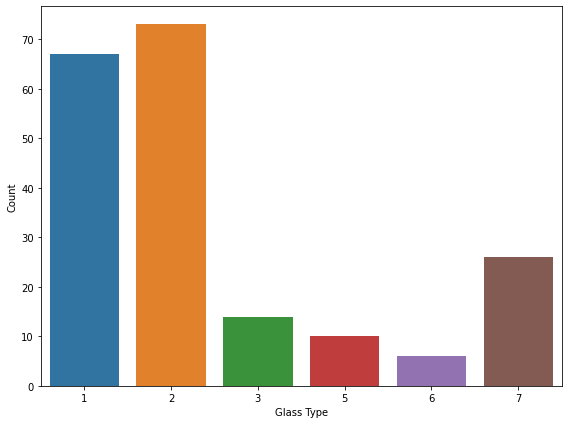

In [10]:
class_counts = data['Type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Glass Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

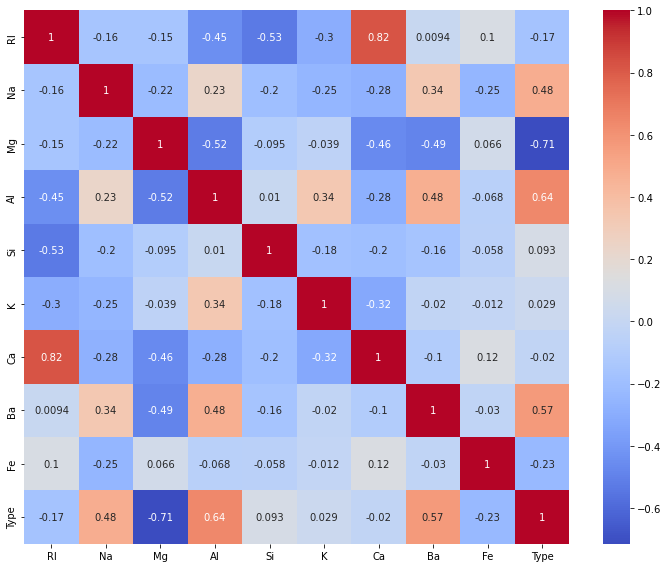

In [12]:
# Attribute Correlation (Heatmap)
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [13]:
X = data.drop('Type', axis=1)
y = data['Type']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
knn_euclidean = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn_manhattan = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

In [17]:

knn_euclidean.fit(X_train, y_train)
knn_manhattan.fit(X_train, y_train)


KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [18]:
y_pred_euclidean = knn_euclidean.predict(X_test)
y_pred_manhattan = knn_manhattan.predict(X_test)

In [19]:
accuracy_euclidean = accuracy_score(y_test, y_pred_euclidean)
accuracy_manhattan = accuracy_score(y_test, y_pred_manhattan)

In [20]:
print("\nAccuracy (Euclidean):", accuracy_euclidean)
print("Accuracy (Manhattan):", accuracy_manhattan)


Accuracy (Euclidean): 0.675
Accuracy (Manhattan): 0.75


In [21]:
report_euclidean = classification_report(y_test, y_pred_euclidean)
report_manhattan = classification_report(y_test, y_pred_manhattan)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
print("\nClassification Report (Euclidean):\n", report_euclidean)
print("Classification Report (Manhattan):\n", report_manhattan)



Classification Report (Euclidean):
               precision    recall  f1-score   support

           1       0.50      0.73      0.59        11
           2       0.78      0.70      0.74        20
           3       0.00      0.00      0.00         1
           5       1.00      0.33      0.50         3
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    accuracy                           0.68        40
   macro avg       0.67      0.59      0.60        40
weighted avg       0.70      0.68      0.67        40

Classification Report (Manhattan):
               precision    recall  f1-score   support

           1       0.57      0.73      0.64        11
           2       0.89      0.80      0.84        20
           3       0.00      0.00      0.00         1
           5       1.00      0.67      0.80         3
           6       1.00      1.00      1.00         1
           7       0.75      0.75      0.75         4

    

From the above comparision, knn with manhattan distance is better than the knn with squared euclidean distance